# Networkx

## 역간 승객 이동 정보를 Networkx로 나타내기
- 2017년도 7월 역간 승객 이동 정보 데이터를 사용합니다.
- 각각의 지하철 역을 node로, 역간의 이동을 edge로 나타냅니다.
- centrality가 높은 node일수록 크기를 크게 합니다.
- 이동한 승객 수가 많을수록 큰 weight를 가지도록 edge를 설정합니다.
- 이를 통해 어떤 역이 가장 유동인구가 많은 역인지, 지하철역을 이용하는 승객의 흐름이 어떻게 되는지, 지하철 역들간의 관계가 어떻게 되는지를 알아봅시다!

## 1. 데이터 불러오기

In [1]:
# Import necessary modules
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import re

In [70]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
subway = pd.read_csv('subway.csv')
subway

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


exit_st exit_name  exit_ocb exit_tia exit_tia_name exit_line  \
0           150    서울역(1)       0.0        0      (구)서울메트로         1   
1           150    서울역(1)       0.0        0      (구)서울메트로         1   
2           150    서울역(1)       0.0        0      (구)서울메트로         1   
3           150    서울역(1)       0.0        0      (구)서울메트로         1   
4           150    서울역(1)       0.0        0      (구)서울메트로         1   
5           150    서울역(1)       0.0        0      (구)서울메트로         1   
6           150    서울역(1)       0.0        0      (구)서울메트로         1   
7           150    서울역(1)       0.0        0      (구)서울메트로         1   
8           150    서울역(1)       0.0        0      (구)서울메트로         1   
9           150    서울역(1)       0.0        0      (구)서울메트로         1   
10          150    서울역(1)       0.0        0      (구)서울메트로         1   
11          150    서울역(1)       0.0        0      (구)서울메트로         1   
12          150    서울역(1)       0.0        0      (구)서울메트로         1   
13          150    서울역(1)       0.0        0      (구)서울메트로         1   
14          150    서울역(1)       0.0        0      (구)서울메트로         1   
15          150    서울역(1)       0.0        0      (구)서울메트로         1   
16          150    서울역(1)       0.0        0      (구)서울메트로         1   
17          150    서울역(1)       0.0        0      (구)서울메트로         1   
18          150    서울역(1)       0.0        0      (구)서울메트로         1   
19          150    서울역(1)       0.0        0      (구)서울메트로         1   
20          150    서울역(1)       0.0        0      (구)서울메트로         1   
21          150    서울역(1)       0.0        0      (구)서울메트로         1   
22          150    서울역(1)       0.0        0      (구)서울메트로         1   
23          150    서울역(1)       0.0        0      (구)서울메트로         1   
24          150    서울역(1)       0.0        0      (구)서울메트로         1   
25          150    서울역(1)       0.0        0      (구)서울메트로         1   
26          150    서울역(1)       0.0        0      (구)서울메트로         1   
27          150    서울역(1)       0.0        0      (구)서울메트로         1   
28          150    서울역(1)       0.0        0      (구)서울메트로         1   
29          150    서울역(1)       0.0        0      (구)서울메트로         1   
...         ...       ...       ...      ...           ...       ...   
404406     4615        탑석       1.0        D        의정부경전철        46   
404407     4615        탑석       1.0        D        의정부경전철        46   
404408     4615        탑석       1.0        D        의정부경전철        46   
404409     4615        탑석       1.0        D        의정부경전철        46   
404410     4615        탑석       1.0        D        의정부경전철        46   
404411     4615        탑석       1.0        D        의정부경전철        46   
404412     4615        탑석       1.0        D        의정부경전철        46   
404413     4615        탑석       1.0        D        의정부경전철        46   
404414     4615        탑석       1.0        D        의정부경전철        46   
404415     4615        탑석       1.0        D        의정부경전철        46   
404416     4615        탑석       1.0        D        의정부경전철        46   
404417     4615        탑석       1.0        D        의정부경전철        46   
404418     4615        탑석       1.0        D        의정부경전철        46   
404419     4615        탑석       1.0        D        의정부경전철        46   
404420     4615        탑석       1.0        D        의정부경전철        46   
404421     4615        탑석       1.0        D        의정부경전철        46   
404422     4615        탑석       1.0        D        의정부경전철        46   
404423     4615        탑석       1.0        D        의정부경전철        46   
404424     4615        탑석       1.0        D        의정부경전철        46   
404425     4615        탑석       1.0        D        의정부경전철        46   
404426     4615        탑석       1.0        D        의정부경전철        46   
404427     4615        탑석       1.0        D        의정부경전철        46   
404428     4615        탑석       1.0        D        의정부경전철        46   
404429     4615        탑석       1.0        D    

## 2. 데이터 정리하기

#### 2-1. 결측값이 있는 row를 없애줍시다.

In [3]:
# 결측값 개수 확인
subway.isnull().sum()

exit_st              0
exit_name          222
exit_ocb           766
exit_tia           222
exit_tia_name      222
exit_line          222
exit_line_name     222
entry_st             0
entry_name         238
entry_ocb          780
entry_tia          238
entry_tia_name     238
entry_line         238
entry_line_name    238
ms_in                0
rf_ilban             0
rf_jcard             0
tot_in               0
dtype: int64

In [4]:
# 결측값이 있는 row 없애주기
subway = subway.dropna(axis=0)

In [74]:
subway.shape

(402892, 18)

In [75]:
subway

exit_st exit_name  exit_ocb exit_tia  ... ms_in rf_ilban rf_jcard  tot_in
0           150    서울역(1)       0.0        0  ...     0    19023      195   19218
1           150    서울역(1)       0.0        0  ...     0    37626      432   38058
2           150    서울역(1)       0.0        0  ...     0    56725      617   57342
3           150    서울역(1)       0.0        0  ...     0    24387      138   24525
4           150    서울역(1)       0.0        0  ...     0    23158      228   23386
...         ...       ...       ...      ...  ...   ...      ...      ...     ...
404431     4615        탑석       1.0        D  ...     0      647        0     647
404432     4615        탑석       1.0        D  ...     0      766        0     766
404433     4615        탑석       1.0        D  ...     0     1726        1    1727
404434     4615        탑석       1.0        D  ...     0      658        0     658
404435     4615        탑석       1.0        D  ...     0      491        1     492

[402892 rows x 18 columns]

#### 2-2. row가 너무 많아서 2호선만 하는 것으로 하겠습니다.

In [5]:
# exit line이 2호선
sub2 = subway[subway['exit_line_name'].isin(['2호선'])]
sub2

exit_st exit_name  exit_ocb exit_tia exit_tia_name exit_line  \
6579       201     시청(2)       0.0        0      (구)서울메트로         2   
6580       201     시청(2)       0.0        0      (구)서울메트로         2   
6581       201     시청(2)       0.0        0      (구)서울메트로         2   
6582       201     시청(2)       0.0        0      (구)서울메트로         2   
6583       201     시청(2)       0.0        0      (구)서울메트로         2   
6584       201     시청(2)       0.0        0      (구)서울메트로         2   
6585       201     시청(2)       0.0        0      (구)서울메트로         2   
6586       201     시청(2)       0.0        0      (구)서울메트로         2   
6587       201     시청(2)       0.0        0      (구)서울메트로         2   
6588       201     시청(2)       0.0        0      (구)서울메트로         2   
6589       201     시청(2)       0.0        0      (구)서울메트로         2   
6590       201     시청(2)       0.0        0      (구)서울메트로         2   
6591       201     시청(2)       0.0        0      (구)서울메트로         2   
6592       201     시청(2)       0.0        0      (구)서울메트로         2   
6593       201     시청(2)       0.0        0      (구)서울메트로         2   
6594       201     시청(2)       0.0        0      (구)서울메트로         2   
6595       201     시청(2)       0.0        0      (구)서울메트로         2   
6596       201     시청(2)       0.0        0      (구)서울메트로         2   
6597       201     시청(2)       0.0        0      (구)서울메트로         2   
6598       201     시청(2)       0.0        0      (구)서울메트로         2   
6599       201     시청(2)       0.0        0      (구)서울메트로         2   
6600       201     시청(2)       0.0        0      (구)서울메트로         2   
6601       201     시청(2)       0.0        0      (구)서울메트로         2   
6602       201     시청(2)       0.0        0      (구)서울메트로         2   
6603       201     시청(2)       0.0        0      (구)서울메트로         2   
6604       201     시청(2)       0.0        0      (구)서울메트로         2   
6605       201     시청(2)       0.0        0      (구)서울메트로         2   
6606       201     시청(2)       0.0        0      (구)서울메트로         2   
6607       201     시청(2)       0.0        0      (구)서울메트로         2   
6608       201     시청(2)       0.0        0      (구)서울메트로         2   
...        ...       ...       ...      ...           ...       ...   
38894      250        용두       0.0        0      (구)서울메트로         2   
38895      250        용두       0.0        0      (구)서울메트로         2   
38896      250        용두       0.0        0      (구)서울메트로         2   
38897      250        용두       0.0        0      (구)서울메트로         2   
38898      250        용두       0.0        0      (구)서울메트로         2   
38899      250        용두       0.0        0      (구)서울메트로         2   
38900      250        용두       0.0        0      (구)서울메트로         2   
38901      250        용두       0.0        0      (구)서울메트로         2   
38902      250        용두       0.0        0      (구)서울메트로         2   
38903      250        용두       0.0        0      (구)서울메트로         2   
38904      250        용두       0.0        0      (구)서울메트로         2   
38905      250        용두       0.0        0      (구)서울메트로         2   
38906      250        용두       0.0        0      (구)서울메트로         2   
38907      250        용두       0.0        0      (구)서울메트로         2   
38908      250        용두       0.0        0      (구)서울메트로         2   
38909      250        용두       0.0        0      (구)서울메트로         2   
38910      250        용두       0.0        0      (구)서울메트로         2   
38911      250        용두       0.0        0      (구)서울메트로         2   
38912      250        용두       0.0        0      (구)서울메트로         2   
38914      250        용두       0.0        0      (구)서울메트로         2   
38915      250        용두       0.0        0      (구)서울메트로         2   
38916      250        용두       0.0        0      (구)서울메트로         2   
38917      250        용두       0.0        0      (구)서울메트로         2   
38918      250        용두       0.0        0      (구)서울메트로         2   
38919      250        용두       

In [6]:
# entry line도 2호선
sub2 = sub2[sub2['entry_line_name'].isin(['2호선'])]
sub2

exit_st exit_name  exit_ocb exit_tia exit_tia_name exit_line  \
6589       201     시청(2)       0.0        0      (구)서울메트로         2   
6590       201     시청(2)       0.0        0      (구)서울메트로         2   
6591       201     시청(2)       0.0        0      (구)서울메트로         2   
6592       201     시청(2)       0.0        0      (구)서울메트로         2   
6593       201     시청(2)       0.0        0      (구)서울메트로         2   
6594       201     시청(2)       0.0        0      (구)서울메트로         2   
6595       201     시청(2)       0.0        0      (구)서울메트로         2   
6596       201     시청(2)       0.0        0      (구)서울메트로         2   
6597       201     시청(2)       0.0        0      (구)서울메트로         2   
6598       201     시청(2)       0.0        0      (구)서울메트로         2   
6599       201     시청(2)       0.0        0      (구)서울메트로         2   
6600       201     시청(2)       0.0        0      (구)서울메트로         2   
6601       201     시청(2)       0.0        0      (구)서울메트로         2   
6602       201     시청(2)       0.0        0      (구)서울메트로         2   
6603       201     시청(2)       0.0        0      (구)서울메트로         2   
6604       201     시청(2)       0.0        0      (구)서울메트로         2   
6605       201     시청(2)       0.0        0      (구)서울메트로         2   
6606       201     시청(2)       0.0        0      (구)서울메트로         2   
6607       201     시청(2)       0.0        0      (구)서울메트로         2   
6608       201     시청(2)       0.0        0      (구)서울메트로         2   
6609       201     시청(2)       0.0        0      (구)서울메트로         2   
6610       201     시청(2)       0.0        0      (구)서울메트로         2   
6611       201     시청(2)       0.0        0      (구)서울메트로         2   
6612       201     시청(2)       0.0        0      (구)서울메트로         2   
6613       201     시청(2)       0.0        0      (구)서울메트로         2   
6614       201     시청(2)       0.0        0      (구)서울메트로         2   
6615       201     시청(2)       0.0        0      (구)서울메트로         2   
6616       201     시청(2)       0.0        0      (구)서울메트로         2   
6617       201     시청(2)       0.0        0      (구)서울메트로         2   
6618       201     시청(2)       0.0        0      (구)서울메트로         2   
...        ...       ...       ...      ...           ...       ...   
38375      250        용두       0.0        0      (구)서울메트로         2   
38376      250        용두       0.0        0      (구)서울메트로         2   
38377      250        용두       0.0        0      (구)서울메트로         2   
38378      250        용두       0.0        0      (구)서울메트로         2   
38379      250        용두       0.0        0      (구)서울메트로         2   
38380      250        용두       0.0        0      (구)서울메트로         2   
38381      250        용두       0.0        0      (구)서울메트로         2   
38382      250        용두       0.0        0      (구)서울메트로         2   
38383      250        용두       0.0        0      (구)서울메트로         2   
38384      250        용두       0.0        0      (구)서울메트로         2   
38385      250        용두       0.0        0      (구)서울메트로         2   
38386      250        용두       0.0        0      (구)서울메트로         2   
38387      250        용두       0.0        0      (구)서울메트로         2   
38388      250        용두       0.0        0      (구)서울메트로         2   
38389      250        용두       0.0        0      (구)서울메트로         2   
38390      250        용두       0.0        0      (구)서울메트로         2   
38391      250        용두       0.0        0      (구)서울메트로         2   
38392      250        용두       0.0        0      (구)서울메트로         2   
38393      250        용두       0.0        0      (구)서울메트로         2   
38394      250        용두       0.0        0      (구)서울메트로         2   
38395      250        용두       0.0        0      (구)서울메트로         2   
38396      250        용두       0.0        0      (구)서울메트로         2   
38397      250        용두       0.0        0      (구)서울메트로         2   
38398      250        용두       0.0        0      (구)서울메트로         2   
38399      250        용두       

In [8]:
# sub2.to_csv('subway2.csv')

## 2. 네트워크 그려보기

In [30]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as mpl
from matplotlib import rc
mpl.rcParams['axes.unicode_minus'] = False
#그래프에서 - 폰트 깨지는거 방지
fontlocation="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=fontlocation).get_name()
rc('font', family=font_name)
from matplotlib import style

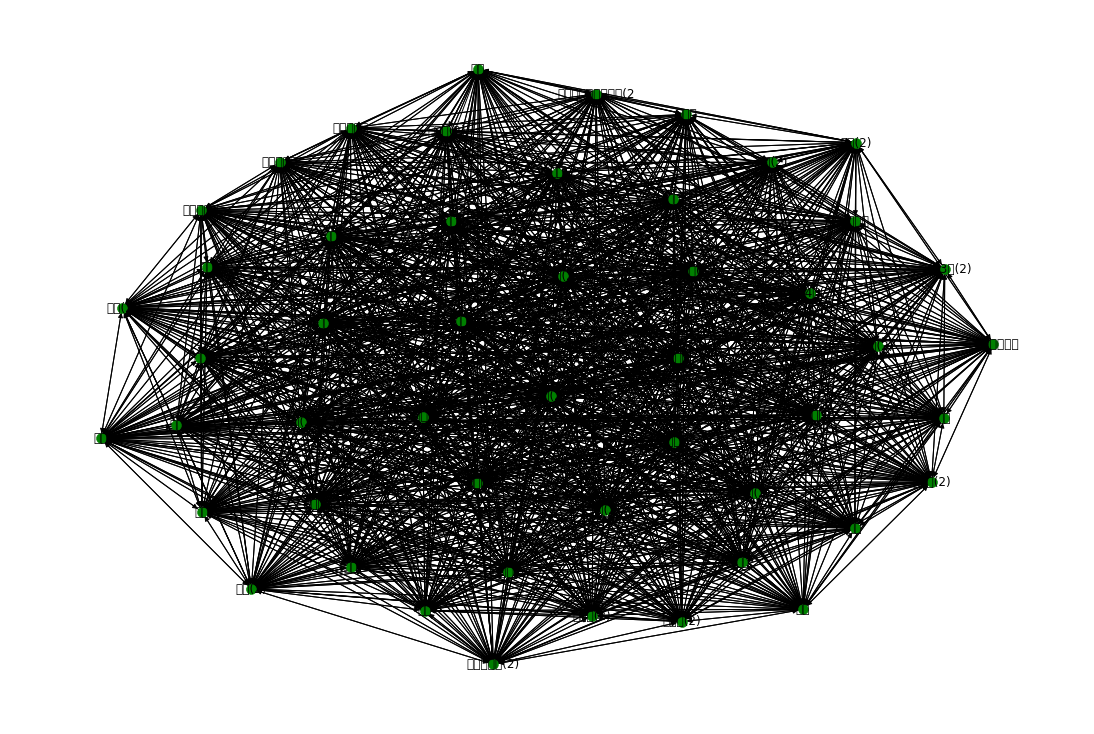

In [31]:
# 지하철 역간의 이동 흐름을 알아보기 위해서는 nx.digraph를 이용하는 것이 좋겠습니다.
# 빈 그래프 생성
G = nx.from_pandas_edgelist(sub2, 'entry_name', 'exit_name', create_using=nx.DiGraph()) 
 
# Plot it
plt.figure(figsize=(15, 10))
nx.draw(G,
        with_labels=True,
        node_color="green",
        node_size = 100,
        #pos = pos,
        font_family=font_name
       )

### Node Weight 반영하기

#### Node Weight의 기준을 2가지로 해보겠습니다.
- degree
- betweenness centrality

In [79]:
# degree값 구하기
degree = dict(G.degree())
degree

{'강남': 100,
 '강변': 100,
 '건대입구(2)': 100,
 '교대(2)': 100,
 '구로디지털단지': 100,
 '구의': 100,
 '낙성대': 100,
 '당산(2)': 100,
 '대림(2)': 100,
 '도림천': 97,
 '동대문역사문화공원(2': 100,
 '뚝섬': 100,
 '문래': 100,
 '방배': 100,
 '봉천': 100,
 '사당(2)': 100,
 '삼성': 100,
 '상왕십리': 100,
 '서울대입구': 100,
 '서초': 100,
 '선릉(2)': 100,
 '성수': 100,
 '시청(2)': 100,
 '신답': 98,
 '신당(2)': 100,
 '신대방': 100,
 '신도림(2)': 100,
 '신림': 100,
 '신설동(2)': 100,
 '신정네거리': 100,
 '신천': 100,
 '신촌(2)': 100,
 '아현': 100,
 '양천구청': 100,
 '역삼': 100,
 '영등포구청(2)': 100,
 '왕십리(2)': 100,
 '용답': 99,
 '용두': 100,
 '을지로3가(2)': 100,
 '을지로4가(2)': 100,
 '을지로입구': 100,
 '이대': 100,
 '잠실(2)': 100,
 '잠실나루(성내)': 100,
 '종합운동장': 100,
 '충정로(2)': 100,
 '한양대': 100,
 '합정(2)': 100,
 '홍대입구(2)': 100}

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text

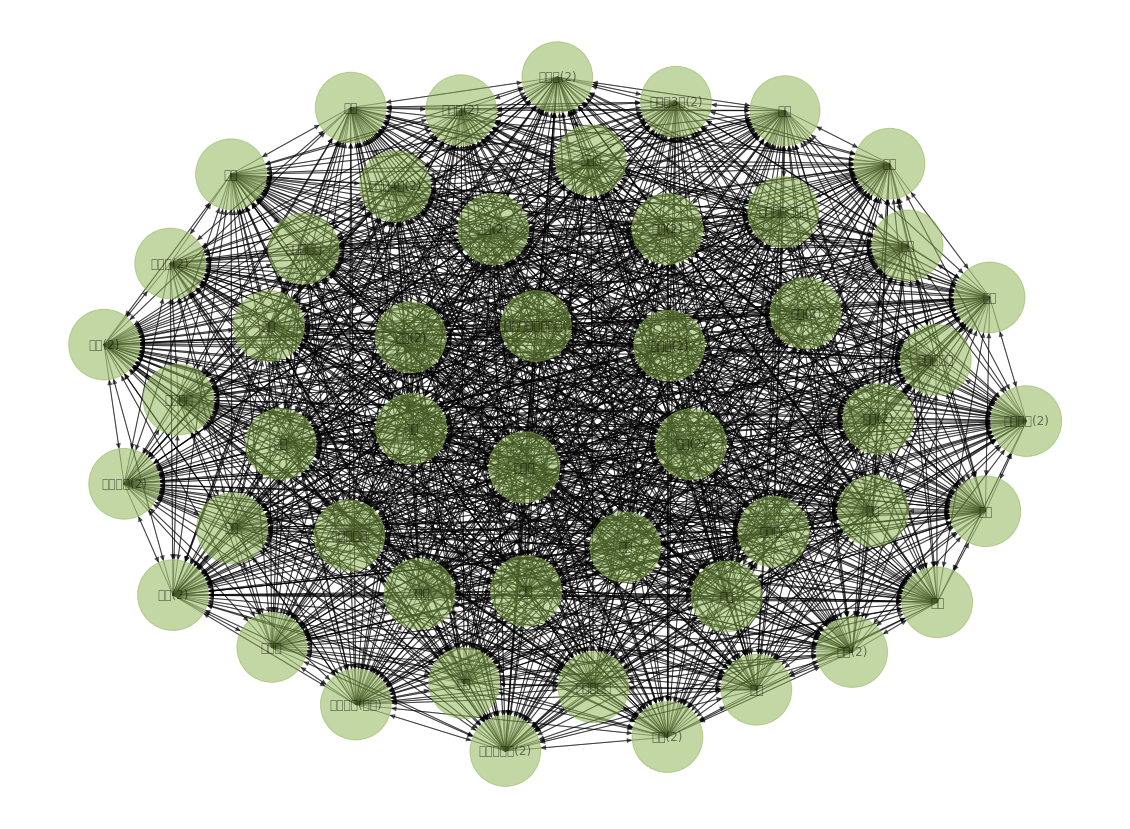

In [80]:
# 많은 관계를 가질 수록 node를 크게 만들기
graph_degrees = G.degree() # Degree 값 구하기
node_sizes = [graph_degrees[x] * 50 for x in G.nodes] # Node Size로 Rescale

plt.figure(figsize=(20, 15))
plt.axis('off')
nx.draw_networkx(G, node_size=node_sizes, node_color='#88B04B', alpha=0.5)

#  모든 node 사이에는 하나의 edge가 있기 때문에 degree는 적합하지 않습니다.

In [81]:
# betweenness centrality를 구해보겠습니다.
bet = nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)
bet

{'강남': 2.695005307087374e-05,
 '강변': 2.695005307087374e-05,
 '건대입구(2)': 2.695005307087374e-05,
 '교대(2)': 2.695005307087374e-05,
 '구로디지털단지': 2.695005307087374e-05,
 '구의': 2.695005307087374e-05,
 '낙성대': 2.695005307087374e-05,
 '당산(2)': 2.695005307087374e-05,
 '대림(2)': 2.695005307087374e-05,
 '도림천': 0.0,
 '동대문역사문화공원(2': 2.695005307087374e-05,
 '뚝섬': 2.695005307087374e-05,
 '문래': 2.695005307087374e-05,
 '방배': 2.695005307087374e-05,
 '봉천': 2.695005307087374e-05,
 '사당(2)': 2.695005307087374e-05,
 '삼성': 2.695005307087374e-05,
 '상왕십리': 2.695005307087374e-05,
 '서울대입구': 2.695005307087374e-05,
 '서초': 2.695005307087374e-05,
 '선릉(2)': 2.695005307087374e-05,
 '성수': 2.695005307087374e-05,
 '시청(2)': 2.695005307087374e-05,
 '신답': 0.0,
 '신당(2)': 2.695005307087374e-05,
 '신대방': 2.695005307087374e-05,
 '신도림(2)': 2.695005307087374e-05,
 '신림': 2.695005307087374e-05,
 '신설동(2)': 2.695005307087374e-05,
 '신정네거리': 2.695005307087374e-05,
 '신천': 2.695005307087374e-05,
 '신촌(2)': 2.695005307087374e-05,
 '아현': 2.69500

In [97]:
max(bet)

'홍대입구(2)'

In [98]:
# betweenness centrality가 가장 높은 순서대로
import operator
a = sorted(bet.items(), reverse= True, key = operator.itemgetter(1))
a

[('시청(2)', 2.695005307087374e-05),
 ('을지로입구', 2.695005307087374e-05),
 ('을지로3가(2)', 2.695005307087374e-05),
 ('을지로4가(2)', 2.695005307087374e-05),
 ('동대문역사문화공원(2', 2.695005307087374e-05),
 ('신당(2)', 2.695005307087374e-05),
 ('상왕십리', 2.695005307087374e-05),
 ('왕십리(2)', 2.695005307087374e-05),
 ('한양대', 2.695005307087374e-05),
 ('뚝섬', 2.695005307087374e-05),
 ('성수', 2.695005307087374e-05),
 ('건대입구(2)', 2.695005307087374e-05),
 ('구의', 2.695005307087374e-05),
 ('강변', 2.695005307087374e-05),
 ('잠실나루(성내)', 2.695005307087374e-05),
 ('잠실(2)', 2.695005307087374e-05),
 ('신천', 2.695005307087374e-05),
 ('종합운동장', 2.695005307087374e-05),
 ('삼성', 2.695005307087374e-05),
 ('선릉(2)', 2.695005307087374e-05),
 ('역삼', 2.695005307087374e-05),
 ('강남', 2.695005307087374e-05),
 ('교대(2)', 2.695005307087374e-05),
 ('서초', 2.695005307087374e-05),
 ('방배', 2.695005307087374e-05),
 ('사당(2)', 2.695005307087374e-05),
 ('낙성대', 2.695005307087374e-05),
 ('서울대입구', 2.695005307087374e-05),
 ('봉천', 2.695005307087374e-05),
 ('신림

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text

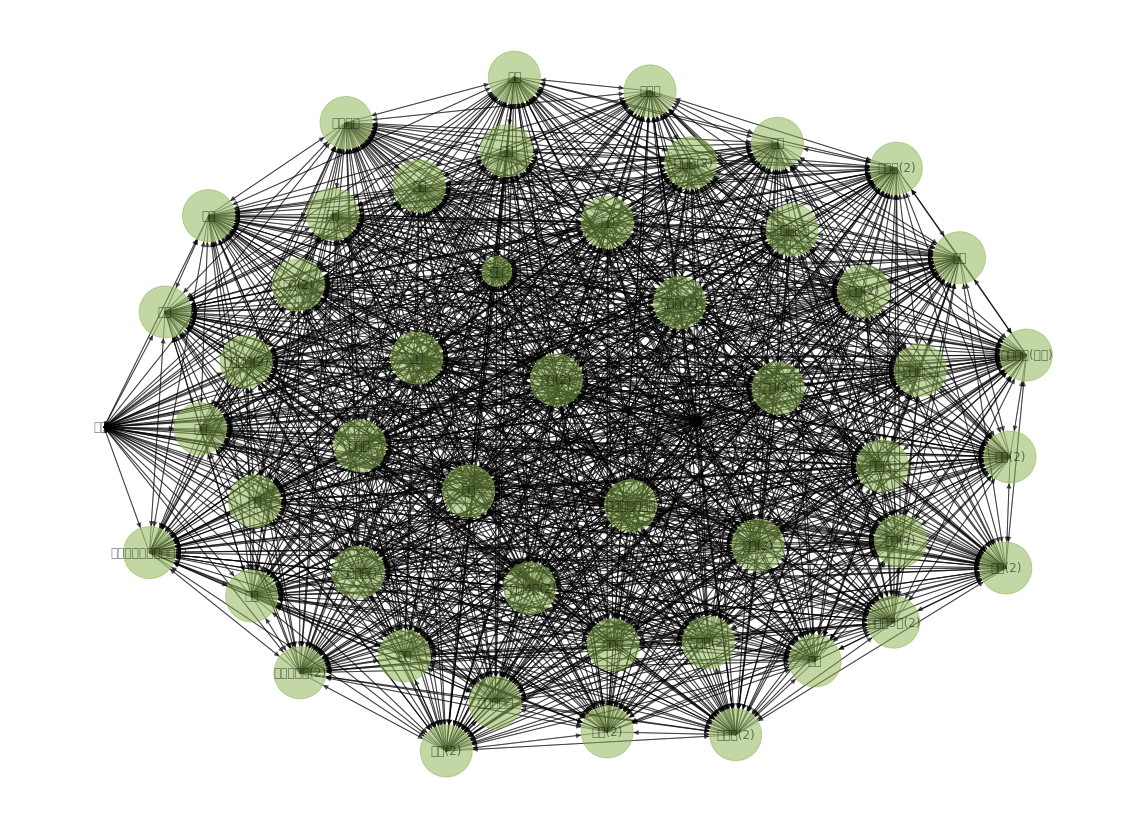

In [99]:
# 많은 관계를 가질 수록 node를 크게 만들기
node_sizes = [bet[x] * 100000000 for x in G.nodes] # Node Size로 Rescale

plt.figure(figsize=(20, 15))
plt.axis('off')
nx.draw_networkx(G, node_size=node_sizes, node_color='#88B04B', alpha=0.5)

### Edge Weight 반영하기

In [100]:
links = list(sub2['tot_in'])
links

[3619,
 8501,
 7214,
 3786,
 6547,
 6633,
 5932,
 6520,
 2759,
 4724,
 4819,
 10949,
 6916,
 11927,
 7060,
 19436,
 7979,
 2469,
 5436,
 3355,
 2540,
 3327,
 1727,
 695,
 662,
 881,
 3141,
 4934,
 3979,
 12640,
 7433,
 13567,
 7544,
 10008,
 7599,
 7723,
 17331,
 14540,
 25418,
 17731,
 7530,
 6730,
 5566,
 302,
 44,
 115,
 137,
 1709,
 1439,
 93,
 10670,
 13889,
 11017,
 12193,
 22542,
 17767,
 14132,
 16816,
 6255,
 9673,
 10905,
 25883,
 13203,
 19780,
 12477,
 35621,
 13762,
 3705,
 10721,
 5367,
 4003,
 5444,
 2263,
 757,
 582,
 1092,
 3570,
 6880,
 5281,
 18881,
 13389,
 28498,
 19806,
 24975,
 11253,
 12321,
 30192,
 30529,
 70962,
 55512,
 24025,
 18135,
 17799,
 896,
 90,
 321,
 148,
 2948,
 2316,
 337,
 8206,
 8790,
 6063,
 3908,
 7512,
 9825,
 7996,
 7758,
 2902,
 5985,
 5894,
 10742,
 7598,
 11604,
 5615,
 16448,
 6045,
 1730,
 3782,
 2328,
 1262,
 1475,
 269,
 202,
 210,
 401,
 1229,
 2751,
 2497,
 8251,
 4836,
 11597,
 5649,
 10887,
 4687,
 4787,
 11612,
 10899,
 23772,
 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text

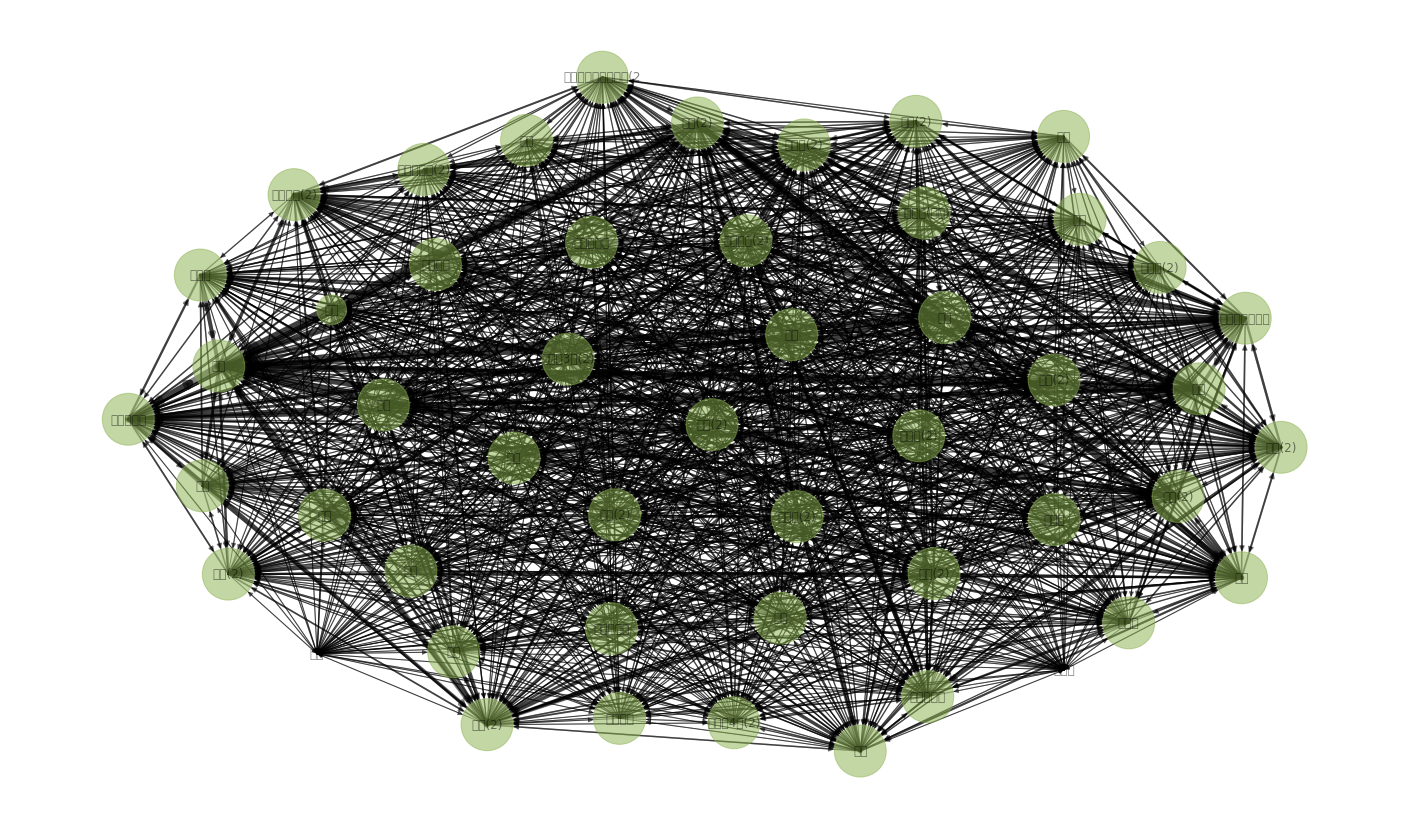

In [101]:
# 관계가 강할수록 edge의 굵기를 굵게하기
# sub2에서 tot_in 항목만 추출한다
edge_width = links
# 1~10 정도로 스케일을 조정한다
edge_width = [(x / max(edge_width) * 9) + 1 for x in edge_width]

plt.figure(figsize=(25, 15))
plt.axis('off')
nx.draw_networkx(G, 
                 node_size=node_sizes, width=edge_width,
                 node_color='#88B04B', alpha=0.5)